Maximum Heat Capacity: 0.0000 J/K
Dissociation Temperature (Maximum C_V): 30.0000 K


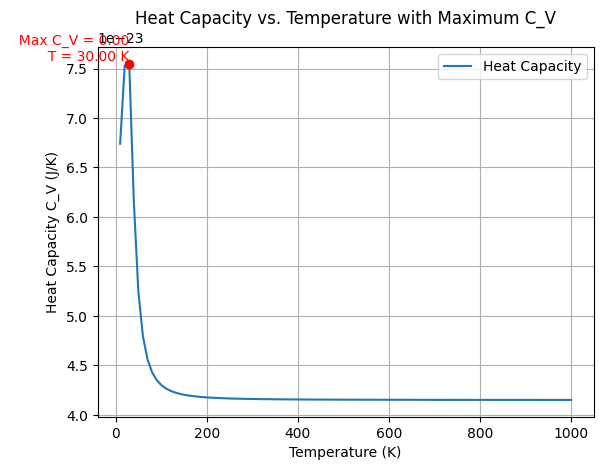

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from comp_part_func import partition_function
from scipy.constants import k, h

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Function to calculate U using np.gradient
def internal_energy(T):
    # Convert temperature value to beta (1 / k_B T)
    beta = 1 / (k * T)
    
    # Calculate the partition function Z for the given temperature T
    Z = partition_function(T)
    
    # Small finite difference step for numerical differentiation
    delta_T = T * 0.01  # Ensure this is appropriately small for your system
    
    # Calculate partition function at T + delta_T and T - delta_T for numerical differentiation
    Z_plus = partition_function(T + delta_T)
    Z_minus = partition_function(T - delta_T)
    
    # Calculate the difference in beta for T + delta_T and T - delta_T
    delta_beta = (1 / (k * (T + delta_T))) - (1 / (k * (T - delta_T)))
    
    # Use central difference to calculate d(ln Z) / d(beta)
    dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / delta_beta
    
    # Internal energy U = - d(ln Z) / d(beta)
    U = -(dlnZ_dBeta)
    
    return U

# Heat capacity C_V from internal energy U
def heat_capacity(T):
    U_values = np.array([internal_energy(T) for T in T_values])
    C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
    return C_V_values

# Plotting the heat capacity and adding the dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    
    # Mark the maximum heat capacity point
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2f}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Calculate the dissociation temperature
def find_dissociation_temperature(C_V_values):
    # Find the index of the maximum heat capacity
    max_index = np.argmax(C_V_values)
    
    # Temperature at which the maximum heat capacity occurs
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    
    # Print the maximum heat capacity and corresponding temperature
    print(f"Maximum Heat Capacity: {max_CV:.4f} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.4f} K")
    
    return dissociation_temp, max_CV

# Main execution
C_V_values = heat_capacity(T_values)  # Calculate C_V
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature

# Plot the heat capacity with the maximum heat capacity annotated
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)
